# HEX algorithm **Kopuru Vespa Velutina Competition**

Purpose: to predict the yearly amount of Vespa Velutina Wasp nests in each of Biscay's municipalities.

Output: WaspBusters' prediction for submission to Kopuru *(WaspBusters_2021MMDD_batchNAME.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Get the data

In [17]:
# Base packages -----------------------------------
import pandas as pd
import numpy as np

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# SKLearn -----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Naive Bayes -------------------------------------
from sklearn.naive_bayes import GaussianNB

In [5]:
QUEEN_train = pd.read_csv('WBds03_QUEENtrain.csv', sep=',')
QUEEN_predict = pd.read_csv('WBds03_QUEENpredict.csv', sep=',')

## Ready the data

In [7]:
QUEEN_train.columns

Index(['year_x', 'municip_name', 'species', 'municip_code', 'month',
       'year_offset', 'waspbust_id', 'colonies_amount', 'food_fruit',
       'food_apple', 'food_txakoli', 'food_kiwi', 'food_pear',
       'food_blueberry', 'food_raspberry', 'station_code', 'codigo', 'freez',
       'hum', 'lev_max', 'lev_mid', 'lev_min', 'rain', 'rain_1mm', 'rain_cum',
       'rain_max_10', 'rain_max_day', 'sun', 'temp_avg', 'temp_max_abs',
       'temp_max_avg', 'temp_min_abs', 'wind_avg', 'wind_max', 'wind_max_avg',
       'population'],
      dtype='object')

In [13]:
# making the dataframe model-ready:

#QUEEN_train['year_offset'] = pd.to_datetime(QUEEN_train['year_offset'])
#QUEEN_train['nest_foundDate'] = pd.to_datetime(QUEEN_train['nest_foundDate'])
QUEEN_train['municip_name'] = QUEEN_train.municip_name.astype('category')
QUEEN_train['municip_code'] = QUEEN_train.municip_code.astype(int) 
QUEEN_train['species'] = QUEEN_train.species.astype('category')
#QUEEN_train['nest_locType'] = QUEEN_train.nest_locType.astype('category')

#QUEEN_train['nest_status'] = QUEEN_train.nest_status.astype('category')

QUEEN_train['station_code'] = QUEEN_train.station_code.astype('category')
#QUEEN_train['MMM'] = QUEEN_train.MMM.astype('category')

#QUEEN_train.dtypes

In [14]:
QUEEN_train.head()

,year_x,municip_name,species,municip_code,month,year_offset,waspbust_id,colonies_amount,food_fruit,food_apple,...,rain_max_day,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population
0,2018,Abadiño,Vespa Velutina,48001,1,2017,1,160.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
1,2018,Abadiño,Vespa Velutina,48001,2,2017,4,160.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
2,2018,Abadiño,Vespa Velutina,48001,3,2017,1,160.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
3,2018,Abadiño,Vespa Velutina,48001,5,2017,3,160.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
4,2018,Abadiño,Vespa Velutina,48001,6,2017,1,160.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533


In [9]:
QUEEN_predict.head()

,year_x,municip_name,species,municip_code,month,year_offset,colonies_amount_x,food_fruit_x,food_apple_x,food_txakoli_x,...,rain_max_day,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population
0,2020,AbadiÃ±o,Vespa Velutina,48001,1,2019,160.0,NaN,0.0,0.0,...,90.900000,12.516131,13.341667,39.700000,26.600000,3.400000,10.741491,75.764936,40.237987,7.658
1,2020,Abanto y CiÃ©rvana-Abanto Zierbena,Vespa Velutina,48002,1,2019,161.0,NaN,0.0,0.0,...,51.600000,12.506406,14.412870,39.800000,24.900000,5.000000,12.200000,117.700000,69.700000,9.471
2,2020,Ajangiz,Vespa Velutina,48911,1,2019,NaN,17.0,1.0,3.0,...,72.300000,12.527298,13.816667,40.200000,26.500000,2.500000,10.935155,75.613647,40.304712,464.000
3,2020,Alonsotegi,Vespa Velutina,48912,1,2019,200.0,7.0,0.0,1.0,...,29.828186,12.544780,12.969818,26.722881,18.224141,8.396147,11.086672,74.898141,40.183610,2.879
4,2020,Amorebieta-Etxano,Vespa Velutina,48003,1,2019,267.0,NaN,0.0,0.0,...,84.400000,12.523053,13.466667,39.300000,25.900000,3.200000,10.742568,75.635301,40.203758,19.529


In [15]:
QUEEN_train_X = QUEEN_train.drop(columns = ['waspbust_id', 'species', 'municip_name', 'station_code', 'codigo'])
QUEEN_train_X

,year_x,municip_code,month,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,...,rain_max_day,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population
0,2018,48001.0,1,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
1,2018,48001.0,2,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
2,2018,48001.0,3,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
3,2018,48001.0,5,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
4,2018,48001.0,6,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,63.1,12.529042,13.283333,38.4,26.1,0.8,10.868514,82.102336,40.190008,7.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2019,48913.0,8,2018,0.0,13.0,0.0,0.0,4.0,0.0,...,41.3,12.426453,15.058333,34.3,23.6,5.2,17.483333,125.300000,78.300000,1.490
1633,2019,48913.0,11,2018,0.0,13.0,0.0,0.0,4.0,0.0,...,41.3,12.426453,15.058333,34.3,23.6,5.2,17.483333,125.300000,78.300000,1.490
1634,2019,48913.0,12,2018,0.0,13.0,0.0,0.0,4.0,0.0,...,41.3,12.426453,15.058333,34.3,23.6,5.2,17.483333,125.300000,78.300000,1.490
1635,2019,48915.0,1,2018,0.0,21.0,11.0,0.0,0.0,0.0,...,54.1,12.532371,13.141667,34.7,25.0,1.9,11.404201,77.503281,40.371898,413.000


In [16]:
QUEEN_train_X.dtypes

year_x               int64
municip_code       float64
month                int64
year_offset          int64
colonies_amount    float64
food_fruit         float64
food_apple         float64
food_txakoli       float64
food_kiwi          float64
food_pear          float64
food_blueberry     float64
food_raspberry     float64
freez              float64
hum                float64
lev_max            float64
lev_mid            float64
lev_min            float64
rain               float64
rain_1mm           float64
rain_cum           float64
rain_max_10        float64
rain_max_day       float64
sun                float64
temp_avg           float64
temp_max_abs       float64
temp_max_avg       float64
temp_min_abs       float64
wind_avg           float64
wind_max           float64
wind_max_avg       float64
population         float64
dtype: object

In [11]:
QUEEN_train_Y = QUEEN_train['waspbust_id']
QUEEN_train_Y

0       1
1       4
2       1
3       3
4       1
       ..
1632    2
1633    1
1634    1
1635    2
1636    3
Name: waspbust_id, Length: 1637, dtype: int64

## Determine Feature Importance

In [19]:
QUEEN_train_X.columns

Index(['year_x', 'municip_code', 'month', 'year_offset', 'colonies_amount',
       'food_fruit', 'food_apple', 'food_txakoli', 'food_kiwi', 'food_pear',
       'food_blueberry', 'food_raspberry', 'freez', 'hum', 'lev_max',
       'lev_mid', 'lev_min', 'rain', 'rain_1mm', 'rain_cum', 'rain_max_10',
       'rain_max_day', 'sun', 'temp_avg', 'temp_max_abs', 'temp_max_avg',
       'temp_min_abs', 'wind_avg', 'wind_max', 'wind_max_avg', 'population'],
      dtype='object')

In [23]:
# Scale the datasets using MinMaxScaler

scalators = ['year_x', 'municip_code', 'month', 'year_offset', 'colonies_amount', 'food_fruit', 'food_apple', 'food_txakoli', 'food_kiwi', 'food_pear', 'food_blueberry', 'food_raspberry', 'freez', 'hum', 'lev_max', 'lev_mid', 'lev_min', 'rain', 'rain_1mm', 'rain_cum', 'rain_max_10', 'rain_max_day', 'sun', 'temp_avg', 'temp_max_abs', 'temp_max_avg', 'temp_min_abs', 'wind_avg', 'wind_max', 'wind_max_avg', 'population']
QUEEN_train_X[scalators] = preprocessing.minmax_scale(QUEEN_train_X[scalators])

In [24]:
QUEEN_train_X

,year_x,municip_code,month,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,...,rain_max_day,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population
0,0.0,0.000000,0.000000,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.405291,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558
1,0.0,0.000000,0.090909,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.405291,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558
2,0.0,0.000000,0.181818,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.405291,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558
3,0.0,0.000000,0.363636,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.405291,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558
4,0.0,0.000000,0.454545,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.405291,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1.0,0.997812,0.636364,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.159749,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454
1633,1.0,0.997812,0.909091,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.159749,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454
1634,1.0,0.997812,1.000000,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.159749,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454
1635,1.0,1.000000,0.000000,1.0,0.000000,0.076364,0.22,0.0,0.000000,0.0,...,0.303920,0.835538,0.599444,0.649755,0.611768,0.362882,0.316870,0.110781,0.099129,0.416137


In [25]:
# define the model
model_fi = LinearRegression()
# fit the model
model_fi.fit(QUEEN_train_X, QUEEN_train_Y)
# get importance
importance = model_fi.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.99470
Feature: 1, Score: -0.66835
Feature: 2, Score: 2.75189
Feature: 3, Score: -0.99470
Feature: 4, Score: 0.49516
Feature: 5, Score: 7.48230
Feature: 6, Score: -2.49902
Feature: 7, Score: 0.70277
Feature: 8, Score: -1.10176
Feature: 9, Score: -1.28155
Feature: 10, Score: 1.24434
Feature: 11, Score: -0.91776
Feature: 12, Score: -4.69708
Feature: 13, Score: 0.67184
Feature: 14, Score: -2.12136
Feature: 15, Score: 4.38092
Feature: 16, Score: -0.32810
Feature: 17, Score: 4.96036
Feature: 18, Score: -1.75472
Feature: 19, Score: -1.84329
Feature: 20, Score: -0.78740
Feature: 21, Score: 2.97034
Feature: 22, Score: 0.38804
Feature: 23, Score: 3.65776
Feature: 24, Score: 3.46264
Feature: 25, Score: -7.44212
Feature: 26, Score: -3.59690
Feature: 27, Score: -0.25496
Feature: 28, Score: 1.31715
Feature: 29, Score: -1.47593
Feature: 30, Score: -1.70078


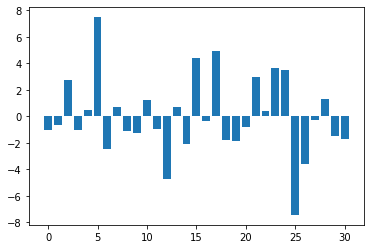

In [26]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Train the model

In [20]:
# Model time! (train the model)
model = ols('waspbust_id ~ weath_humidity + weath_meanTemp', data=QUEEN_train).fit()
print(model.summary())

PatsyError: Error evaluating factor: NameError: name 'weath_meanTemp' is not defined
    waspbust_id ~ weath_humidity + weath_meanTemp
                                   ^^^^^^^^^^^^^^

## Predict

In [19]:
prediction_y_2020 = model.predict(QUEEN_predict)
prediction_y_2020

NameError: name 'model' is not defined

## Export result to the competition-required template

In [18]:
QUEEN['nests_2020'] = prediction_y_2020

NameError: name 'prediction_y_2020' is not defined

In [ ]:
HEX = QUEEN.loc[:,['municip_code','municip_name','nests_2020']].groupby(by=['municip_code','municip_name'], as_index=False).sum().round().dropna()
HEX.columns = ['CODIGO MUNICIPIO','NOMBRE MUNICIPIO','NIDOS 2020']

In [ ]:
# Save the new dataFrame as a .csv in the current working directory
HEX.to_csv('WaspBusters_20210512_OLSyears.csv', index=False)